In [155]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from statistics import median
from statistics import mean
import cv2
from numpy import bitwise_xor
from statistics import mode
from scipy import stats as s
import glob

In [215]:
loc2 = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P6/test/highway_test.png'
test_rgb = np.array(Image.open(loc2))
image_test = np.array(Image.open(loc2).convert('L'))

In [216]:
loc = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P6/frames/*.png'
image_list = []
for filename in glob.glob(loc):
    im=Image.open(filename).convert('L')
    image_list.append(np.array(im))
image_list = np.array(image_list)

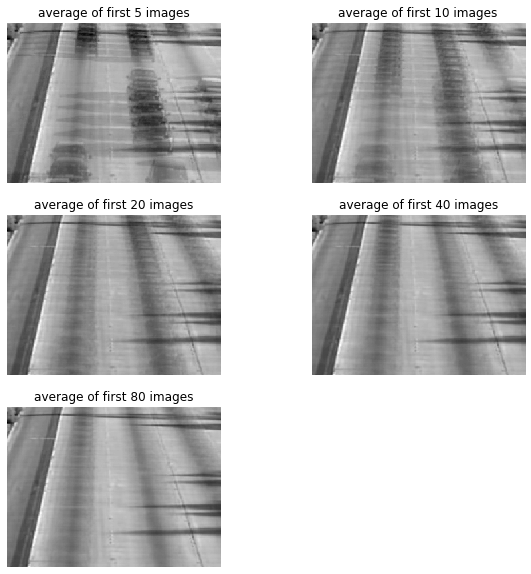

In [217]:
n = [5,10,20,40,80]
count = 0
image_average = []
for i in n:
    matplotlib.rcParams['figure.figsize'] = [10,10]
    count += 1
    plt.subplot(3,2,count)
    temp_list = image_list[0:i]
    mean_images = np.array(np.mean(temp_list,axis = 0),dtype= int)
    image_average.append(mean_images)
    plt.imshow(mean_images,'gray')
    plt.axis('off')
    plt.title('average of first {} images'.format(i))


In [218]:
image_average = np.array(image_average)
subtracted = image_test - image_average

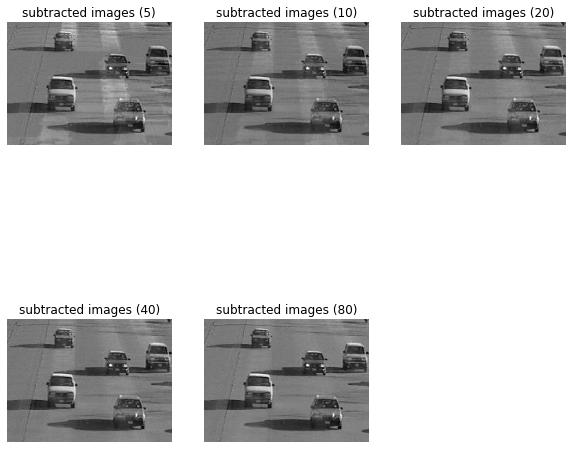

In [219]:
subtracted = np.array(subtracted,dtype = int)
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(subtracted[i],'gray')
    plt.axis('off')
    plt.title('subtracted images ({})'.format(n[i]))

In [220]:
subtracted = image_test - image_average

In [221]:
thresh_sub = []
for i in range(5):
    thresh_sub.append([])
    thresh_sub[i] = subtracted[i].astype(np.uint8)

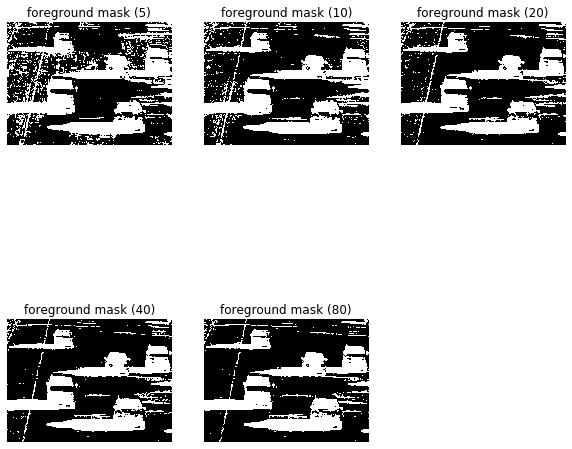

In [222]:
foreground = []
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.threshold(thresh_sub[i], 130, 255, cv2.THRESH_BINARY)[1] ,'gray')
    foreground.append(cv2.threshold(thresh_sub[i], 130, 255, cv2.THRESH_BINARY)[1])
    plt.axis('off')
    plt.title('foreground mask ({})'.format(n[i]))

In [223]:
best_mask = foreground[4]

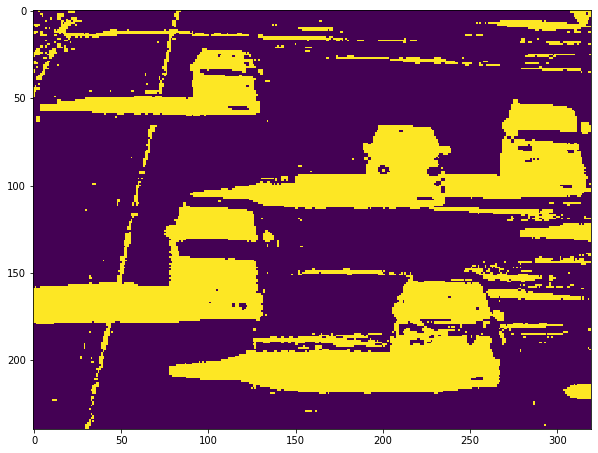

In [224]:
plt.imshow(best_mask)

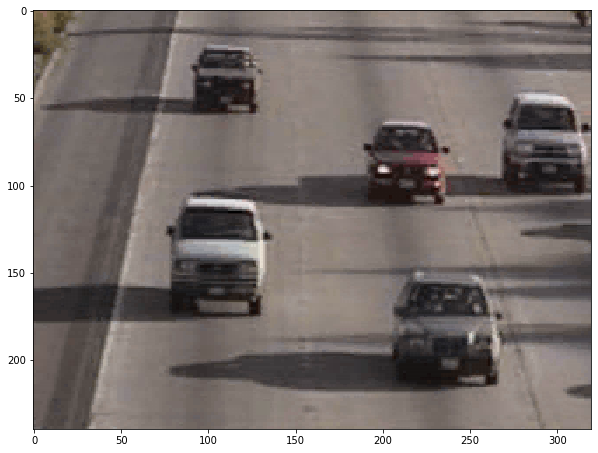

In [225]:
plt.imshow(test_rgb)

In [226]:
x , y = best_mask.shape
for i in range(x):
    for j in range(y):
        if best_mask[i,j] == 0:
            test_rgb[i,j] = [0,0,0]

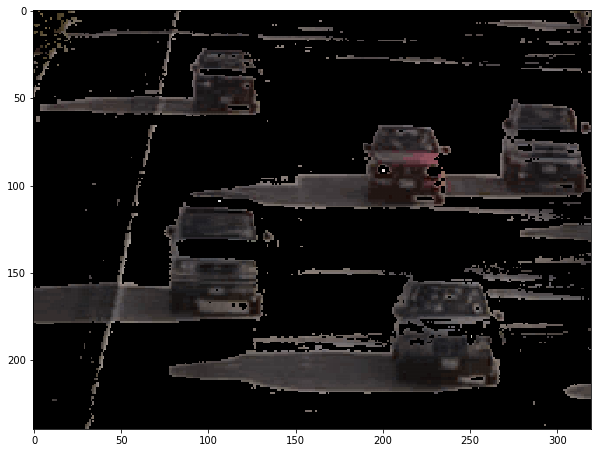

In [214]:
plt.imshow(test_rgb)